# Criação do Modelo de Predição da Concessão de Crédito

# Pré-Processamento
* Remoção de Colunas e Outliers

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('df_model.csv')

In [28]:
df = df.drop(['Limite de Credito','Empresa','SCORE GO ON','RATING GO ON','EBITDA','Divida'],axis=1)

In [29]:
df

,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,...,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target
0,8.44,3,-0.94,5,1.94,4,101,5,31.81,2,...,5,1,5,2,5,900,4,3.65,4,1
1,3.70,2,2.23,2,0.62,2,99,5,-10.16,1,...,2,0,1,0,1,50,1,1.85,2,0
2,8.00,3,1.72,2,0.59,2,118,5,73.67,4,...,3,1,5,0,1,200,1,3.05,3,1
3,3.35,2,2.19,2,0.51,2,51,5,81.34,5,...,2,2,5,0,1,400,2,2.95,3,1
4,8.61,3,-0.17,5,2.40,5,21,4,69.11,4,...,5,2,5,3,5,550,3,4.05,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,4.85,2,2.82,1,0.56,2,95,5,49.27,3,...,3,0,1,5,3,600,3,2.30,2,0
49859,11.85,4,0.02,5,1.31,3,-31,1,126.84,5,...,5,2,5,0,1,700,3,3.70,4,1
49860,13.15,5,0.34,5,1.20,3,-17,2,124.71,5,...,5,5,5,2,5,850,4,4.25,5,1
49861,5.77,2,2.72,1,0.87,2,148,5,-9.64,1,...,3,1,5,0,1,150,1,2.15,2,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49863 entries, 0 to 49862
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Margem EBITDA             49863 non-null  float64
 1   nota_i1                   49863 non-null  int64  
 2   Divida liquida/EBTIDA     49863 non-null  float64
 3   nota_i2                   49863 non-null  int64  
 4   Indice de liquidez        49863 non-null  float64
 5   nota_i3                   49863 non-null  int64  
 6   Ciclo Financeiro          49863 non-null  int64  
 7   nota_i4                   49863 non-null  int64  
 8   Conversao Ebitda em FCO   49863 non-null  float64
 9   nota_i5                   49863 non-null  int64  
 10  Tempo de atuação em anos  49863 non-null  int64  
 11  nota_i6                   49863 non-null  int64  
 12  Auditorias                49863 non-null  int64  
 13  nota_i7                   49863 non-null  int64  
 14  PEFIN 

## IQR - Outliers Removal

* Método IQR (Intervalo Interquartil)

In [6]:
import pandas as pd

def remove_outliers_iqr(df, features):
    filtered_df = df.copy()
    for col in features:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered_df = filtered_df[(filtered_df[col] >= lower) & (filtered_df[col] <= upper)]
    return filtered_df


In [31]:
features = ['Margem EBITDA','Divida liquida/EBTIDA', 'Indice de liquidez','Ciclo Financeiro',
            'Conversao Ebitda em FCO', 'Tempo de atuação em anos', 'Serasa Score' ]

In [8]:
df_iqr = remove_outliers_iqr(df, features)

In [9]:
df_iqr

,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,...,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,Target
0,8.44,3,-0.94,5,1.94,4,101,5,31.81,2,...,2,0,5,1,5,2,5,900,4,1
1,3.70,2,2.23,2,0.62,2,99,5,-10.16,1,...,1,1,2,0,1,0,1,50,1,0
2,8.00,3,1.72,2,0.59,2,118,5,73.67,4,...,5,2,3,1,5,0,1,200,1,1
3,3.35,2,2.19,2,0.51,2,51,5,81.34,5,...,5,3,2,2,5,0,1,400,2,1
4,8.61,3,-0.17,5,2.40,5,21,4,69.11,4,...,5,0,5,2,5,3,5,550,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,4.85,2,2.82,1,0.56,2,95,5,49.27,3,...,1,2,3,0,1,5,3,600,3,0
49859,11.85,4,0.02,5,1.31,3,-31,1,126.84,5,...,5,0,5,2,5,0,1,700,3,1
49860,13.15,5,0.34,5,1.20,3,-17,2,124.71,5,...,4,0,5,5,5,2,5,850,4,1
49861,5.77,2,2.72,1,0.87,2,148,5,-9.64,1,...,1,7,3,1,5,0,1,150,1,0


In [10]:
df_iqr['Target'].value_counts()

Target
1    30111
0    15637
Name: count, dtype: int64

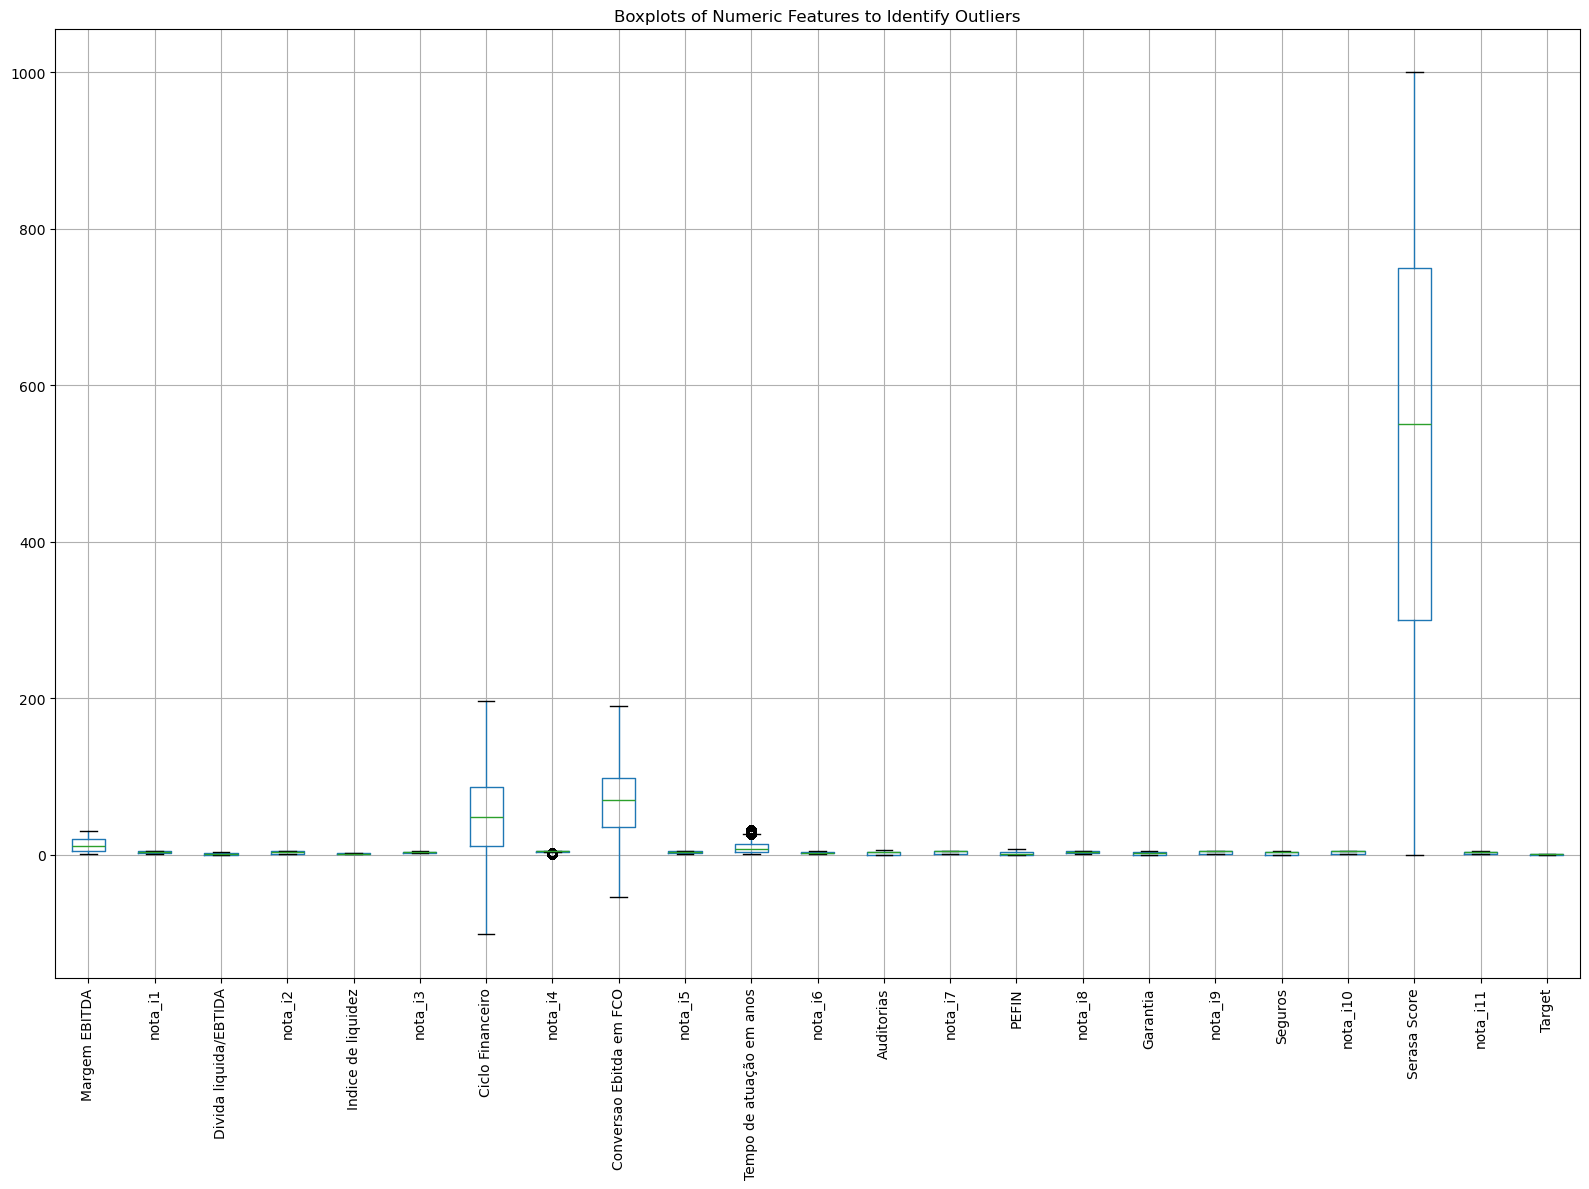

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_sim = pd.DataFrame(df_iqr)

# Plotting boxplots for outlier visualization
plt.figure(figsize=(16, 12))
df_sim.boxplot(rot=90)
plt.title("Boxplots of Numeric Features to Identify Outliers")
plt.tight_layout()
plt.grid(True)
plt.show()


In [12]:
df_iqr

,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,...,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,Target
0,8.44,3,-0.94,5,1.94,4,101,5,31.81,2,...,2,0,5,1,5,2,5,900,4,1
1,3.70,2,2.23,2,0.62,2,99,5,-10.16,1,...,1,1,2,0,1,0,1,50,1,0
2,8.00,3,1.72,2,0.59,2,118,5,73.67,4,...,5,2,3,1,5,0,1,200,1,1
3,3.35,2,2.19,2,0.51,2,51,5,81.34,5,...,5,3,2,2,5,0,1,400,2,1
4,8.61,3,-0.17,5,2.40,5,21,4,69.11,4,...,5,0,5,2,5,3,5,550,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,4.85,2,2.82,1,0.56,2,95,5,49.27,3,...,1,2,3,0,1,5,3,600,3,0
49859,11.85,4,0.02,5,1.31,3,-31,1,126.84,5,...,5,0,5,2,5,0,1,700,3,1
49860,13.15,5,0.34,5,1.20,3,-17,2,124.71,5,...,4,0,5,5,5,2,5,850,4,1
49861,5.77,2,2.72,1,0.87,2,148,5,-9.64,1,...,1,7,3,1,5,0,1,150,1,0


## Z-Score - Outliers Removal

In [36]:
from scipy.stats import zscore
import numpy as np
def remove_outliers_zscore(df, features, threshold=3.0):
    z_scores = np.abs(zscore(df[features]))
    mask = (z_scores < threshold).all(axis=1)
    return df[mask]

In [37]:
df_zscore = remove_outliers_zscore(df, features)

In [38]:
# Comparação do número de Linhas retiradas
row_comparison = {
    "Original": len(df),
    "IQR Cleaned": len(df_iqr),
    "Z-Score Cleaned": len(df_zscore)
}

row_comparison

NameError: name 'df_iqr' is not defined

In [39]:
df_zscore

,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,...,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11,SCORE GO ON,RATING GO ON,Target
0,8.44,3,-0.94,5,1.94,4,101,5,31.81,2,...,5,1,5,2,5,900,4,3.65,4,1
1,3.70,2,2.23,2,0.62,2,99,5,-10.16,1,...,2,0,1,0,1,50,1,1.85,2,0
2,8.00,3,1.72,2,0.59,2,118,5,73.67,4,...,3,1,5,0,1,200,1,3.05,3,1
3,3.35,2,2.19,2,0.51,2,51,5,81.34,5,...,2,2,5,0,1,400,2,2.95,3,1
4,8.61,3,-0.17,5,2.40,5,21,4,69.11,4,...,5,2,5,3,5,550,3,4.05,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,4.85,2,2.82,1,0.56,2,95,5,49.27,3,...,3,0,1,5,3,600,3,2.30,2,0
49859,11.85,4,0.02,5,1.31,3,-31,1,126.84,5,...,5,2,5,0,1,700,3,3.70,4,1
49860,13.15,5,0.34,5,1.20,3,-17,2,124.71,5,...,5,5,5,2,5,850,4,4.25,5,1
49861,5.77,2,2.72,1,0.87,2,148,5,-9.64,1,...,3,1,5,0,1,150,1,2.15,2,0


In [40]:
df_zscore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48721 entries, 0 to 49862
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Margem EBITDA             48721 non-null  float64
 1   nota_i1                   48721 non-null  int64  
 2   Divida liquida/EBTIDA     48721 non-null  float64
 3   nota_i2                   48721 non-null  int64  
 4   Indice de liquidez        48721 non-null  float64
 5   nota_i3                   48721 non-null  int64  
 6   Ciclo Financeiro          48721 non-null  int64  
 7   nota_i4                   48721 non-null  int64  
 8   Conversao Ebitda em FCO   48721 non-null  float64
 9   nota_i5                   48721 non-null  int64  
 10  Tempo de atuação em anos  48721 non-null  int64  
 11  nota_i6                   48721 non-null  int64  
 12  Auditorias                48721 non-null  int64  
 13  nota_i7                   48721 non-null  int64  
 14  PEFIN      

In [41]:
#df_iqr_clean.to_csv('/content/drive/MyDrive/gocn/df_iqr_clean.csv', index=False)
df_zscore.to_csv('df_zscore.csv', index=False)

In [18]:
df_zscore_cleaned = df_zscore.copy()

In [23]:
df_zscore_cleaned = df_zscore_cleaned.drop(['nota_i1', 'nota_i2','nota_i3','nota_i4',
                          'nota_i5','nota_i6','nota_i7','nota_i8',
                            'nota_i9','nota_i10','nota_i11'],axis =1)

In [24]:
df_zscore_cleaned

,Margem EBITDA,Divida liquida/EBTIDA,Indice de liquidez,Ciclo Financeiro,Conversao Ebitda em FCO,Tempo de atuação em anos,Auditorias,PEFIN,Garantia,Seguros,Serasa Score,Target
0,8.44,-0.94,1.94,101,31.81,4,6,0,1,2,900,1
1,3.70,2.23,0.62,99,-10.16,3,0,1,0,0,50,0
2,8.00,1.72,0.59,118,73.67,6,2,2,1,0,200,1
3,3.35,2.19,0.51,51,81.34,2,3,3,2,0,400,1
4,8.61,-0.17,2.40,21,69.11,4,2,0,2,3,550,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49858,4.85,2.82,0.56,95,49.27,3,0,2,0,5,600,0
49859,11.85,0.02,1.31,-31,126.84,11,4,0,2,0,700,1
49860,13.15,0.34,1.20,-17,124.71,15,1,0,5,2,850,1
49861,5.77,2.72,0.87,148,-9.64,14,0,7,1,0,150,0


In [25]:
df_zscore_cleaned.to_csv('df.csv', index=False)

* Ambas tecninas de remoção de outliers são muito uteis para o problema, porém irei escolher a IQR por ser mais agressiva devido a alta quantidade de dados enviesados e outliers.

## Standarização dos dados

* Idealmente a normalização não é necessária em modelos baseados em árvore, pois eles conseguem compreender a distancia entre diferentes valores continuos e categorias, porém gostaria de tentar a aplicação pelo fator da alta dimensionalidade e alta quantidade de dados enviesados.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [20]:
X = df_zscore.drop(['Target'], axis=1)       # Features
y = df_zscore['Target']                      # Target

In [21]:
print("Original Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Original Features (X) head:
   Margem EBITDA  nota_i1  Divida liquida/EBTIDA  nota_i2  Indice de liquidez  \
0           8.44        3                  -0.94        5                1.94   
1           3.70        2                   2.23        2                0.62   
2           8.00        3                   1.72        2                0.59   
3           3.35        2                   2.19        2                0.51   
4           8.61        3                  -0.17        5                2.40   

   nota_i3  Ciclo Financeiro  nota_i4  Conversao Ebitda em FCO  nota_i5  ...  \
0        4               101        5                    31.81        2  ...   
1        2                99        5                   -10.16        1  ...   
2        2               118        5                    73.67        4  ...   
3        2                51        5                    81.34        5  ...   
4        5                21        4                    69.11        4  ...   

   A

In [22]:
# 2. Standardize the features
scaler = StandardScaler()
scaler

StandardScaler()

In [23]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-5.38349591e-01, -4.36485537e-01, -1.58304863e+00, ...,
         8.97810444e-01,  1.35980736e+00,  1.09176597e+00],
       [-1.08113683e+00, -1.10476572e+00,  8.67653364e-01, ...,
        -1.37871107e+00, -1.84762311e+00, -1.31496348e+00],
       [-5.88734905e-01, -4.36485537e-01,  4.73376387e-01, ...,
        -1.37871107e+00, -1.28160597e+00, -1.31496348e+00],
       ...,
       [ 1.00228915e-03,  9.00074820e-01, -5.93490728e-01, ...,
         8.97810444e-01,  1.17113498e+00,  1.09176597e+00],
       [-8.44096835e-01, -1.10476572e+00,  1.24646850e+00, ...,
        -1.37871107e+00, -1.47027835e+00, -1.31496348e+00],
       [-9.78075965e-01, -1.10476572e+00,  1.25419942e+00, ...,
        -1.37871107e+00,  3.91006963e-02,  2.89522820e-01]])

In [24]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Margem EBITDA,nota_i1,Divida liquida/EBTIDA,nota_i2,Indice de liquidez,nota_i3,Ciclo Financeiro,nota_i4,Conversao Ebitda em FCO,nota_i5,...,Auditorias,nota_i7,PEFIN,nota_i8,Garantia,nota_i9,Seguros,nota_i10,Serasa Score,nota_i11
0,-0.538350,-0.436486,-1.583049,0.903017,0.992999,0.697102,1.007965,0.665678,-0.766447,-1.044691,...,1.777477,-0.985130,-0.912160,1.062985,-0.526854,0.750082,-0.241091,0.897810,1.359807,1.091766
1,-1.081137,-1.104766,0.867653,-0.807488,-1.208282,-1.020135,0.969798,0.665678,-1.706925,-1.707189,...,-1.316354,-1.554638,-0.489714,-1.047635,-1.048864,-1.333188,-1.309896,-1.378711,-1.847623,-1.314963
2,-0.588735,-0.436486,0.473376,-0.807488,-1.258312,-1.020135,1.332385,0.665678,0.171566,0.280305,...,-0.285077,0.723397,-0.067267,-0.344095,-0.526854,0.750082,-1.309896,-1.378711,-1.281606,-1.314963
3,-1.121216,-1.104766,0.836730,-0.807488,-1.391723,-1.020135,0.053789,0.665678,0.343438,0.942803,...,0.230562,0.723397,0.355179,-1.047635,-0.004843,0.750082,-1.309896,-1.378711,-0.526916,-0.512720
4,-0.518883,-0.436486,-0.987768,0.903017,1.760112,1.555721,-0.518717,-0.133349,0.069384,0.280305,...,-0.285077,0.723397,-0.912160,1.062985,-0.004843,0.750082,0.293312,0.897810,0.039101,0.289523


## PCA

In [25]:
pca = PCA()
pca

PCA()

In [26]:
pca.fit(X_scaled)

PCA()

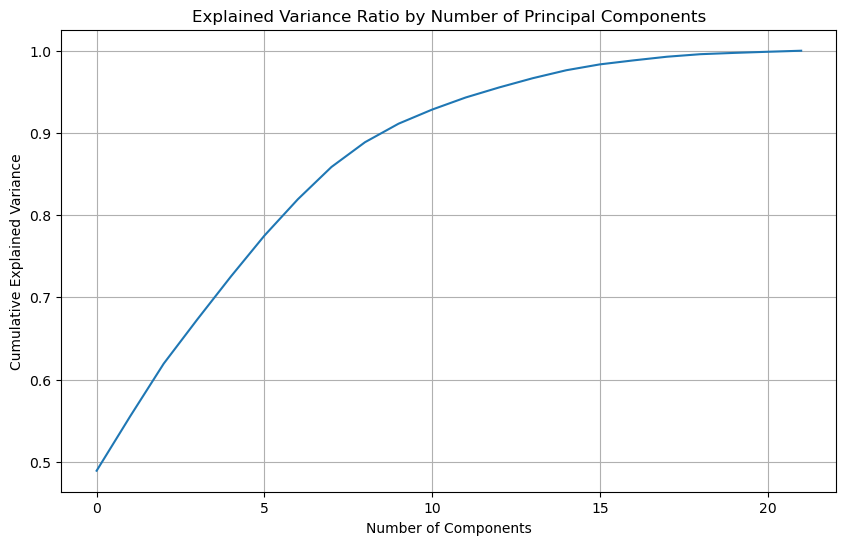

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

In [28]:
n_components_to_retain = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1
print(f"\nNumber of components to explain 95% variance: {n_components_to_retain}")


Number of components to explain 95% variance: 13


In [29]:
pca_final = PCA(n_components=0.95) # Retain components that explain 95% of variance
X_pca = pca_final.fit_transform(X_scaled)

In [30]:
# X_pca is now the transformed data with reduced dimensionality
print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Number of principal components: {X_pca.shape[1]}")
print("\nTransformed data (X_pca) head:")
print(X_pca[:5]) # Print first 5 rows of the PCA transformed data


Original number of features: 22
Number of principal components: 13

Transformed data (X_pca) head:
[[ 1.15233029 -0.79409549 -0.70391556  1.69165185 -0.13137902  1.03913894
   1.90742294 -0.65907269  0.36652264 -1.40177422  0.86235071 -1.19528297
  -1.91920223]
 [-5.23170879  0.27416925 -0.59958234  0.26472446 -1.24934373  0.46213911
   0.24822381 -0.66947071 -0.78456243  0.48872763 -0.01967985  0.08106093
  -0.48002565]
 [-2.65673905 -0.51097607  0.43873964  0.92997493 -0.69251924 -1.49241891
  -0.11424757  1.16375347 -0.16191945  0.7807978  -0.06968679  1.05821222
   0.24713128]
 [-2.50259044 -1.32777541  0.01544111 -0.10101834 -0.39406674 -2.12886551
  -0.02085704  1.26303608  0.94092596 -0.16638174 -0.05084503  0.89027439
   0.2436623 ]
 [ 2.01005891 -1.05482749 -0.89698215  0.53586934 -0.34797953  0.66909702
  -0.14697705 -0.36743082 -1.28158378 -1.59213001  0.42212813  0.93264306
  -0.51686539]]


In [31]:
# If you want to put the PCA results back into a DataFrame (useful for further modeling)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])
print("\nPCA Transformed Data (DataFrame) head:")
print(X_pca_df.head())


PCA Transformed Data (DataFrame) head:
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  1.152330 -0.794095 -0.703916  1.691652 -0.131379  1.039139  1.907423   
1 -5.231709  0.274169 -0.599582  0.264724 -1.249344  0.462139  0.248224   
2 -2.656739 -0.510976  0.438740  0.929975 -0.692519 -1.492419 -0.114248   
3 -2.502590 -1.327775  0.015441 -0.101018 -0.394067 -2.128866 -0.020857   
4  2.010059 -1.054827 -0.896982  0.535869 -0.347980  0.669097 -0.146977   

       PC_8      PC_9     PC_10     PC_11     PC_12     PC_13  
0 -0.659073  0.366523 -1.401774  0.862351 -1.195283 -1.919202  
1 -0.669471 -0.784562  0.488728 -0.019680  0.081061 -0.480026  
2  1.163753 -0.161919  0.780798 -0.069687  1.058212  0.247131  
3  1.263036  0.940926 -0.166382 -0.050845  0.890274  0.243662  
4 -0.367431 -1.281584 -1.592130  0.422128  0.932643 -0.516865  


In [32]:
X_pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,1.152330,-0.794095,-0.703916,1.691652,-0.131379,1.039139,1.907423,-0.659073,0.366523,-1.401774,0.862351,-1.195283,-1.919202
1,-5.231709,0.274169,-0.599582,0.264724,-1.249344,0.462139,0.248224,-0.669471,-0.784562,0.488728,-0.019680,0.081061,-0.480026
2,-2.656739,-0.510976,0.438740,0.929975,-0.692519,-1.492419,-0.114248,1.163753,-0.161919,0.780798,-0.069687,1.058212,0.247131
3,-2.502590,-1.327775,0.015441,-0.101018,-0.394067,-2.128866,-0.020857,1.263036,0.940926,-0.166382,-0.050845,0.890274,0.243662
4,2.010059,-1.054827,-0.896982,0.535869,-0.347980,0.669097,-0.146977,-0.367431,-1.281584,-1.592130,0.422128,0.932643,-0.516865


# Modelagem

## Modelo com Dataset Standarizado

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

* Separação de dados para treino e teste.
* 80% dos dados serão utilizados para o treinamento do modelo!

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

### Árvore de Decisão

In [35]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_probs = dt.predict_proba(X_test)[:, 1]

In [36]:
print("\n=== Decision Tree Evaluation ===")
print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

plt.show()


=== Decision Tree Evaluation ===
[[3011  188]
 [ 155 6391]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3199
           1       0.97      0.98      0.97      6546

    accuracy                           0.96      9745
   macro avg       0.96      0.96      0.96      9745
weighted avg       0.96      0.96      0.96      9745



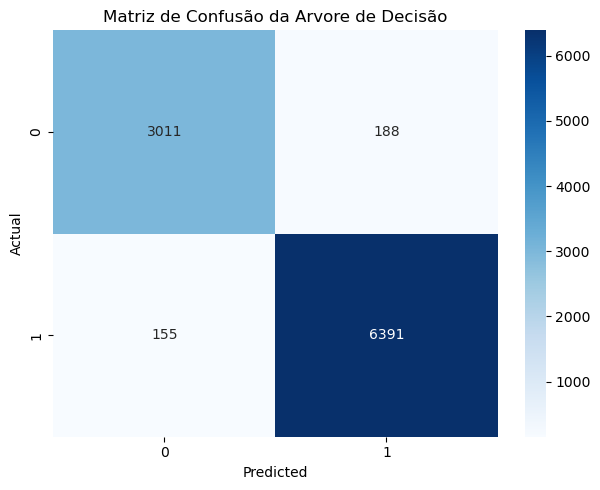

In [37]:
# --- Matriz de Confusão ---

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão da Arvore de Decisão')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Para Árvore de Decisão
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X_pca_df, y, cv=5, scoring='accuracy')
print(f"\nDecision Tree Cross-Validation Accuracy (5-fold): {dt_scores.mean():.4f} (+/- {dt_scores.std():.4f})")




Decision Tree Cross-Validation Accuracy (5-fold): 0.9668 (+/- 0.0019)


### Ramdom Forest

Para o RF será utilziado a lib Grid Search que é uma ferramenta usada para automatizar o processo de ajuste dos parâmetros de um algoritmo, ele faz de maneira sistemática diversas combinações dos parâmetros e depois de avaliá-los os armazenará num único objeto.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# Exemplo para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [41]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [42]:
print(f"\nMelhores parâmetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Melhor acurácia com Random Forest: {grid_search_rf.best_score_:.4f}")


Melhores parâmetros para Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Melhor acurácia com Random Forest: 0.9783


In [43]:
#grid_search_rf.best_estimator_ para fazer previsões 
best_rf_preds = grid_search_rf.best_estimator_.predict(X_test)
print("\n=== Random Forest Otimizado Evaluation ===")
print(confusion_matrix(y_test, best_rf_preds))
print(classification_report(y_test, best_rf_preds))


=== Random Forest Otimizado Evaluation ===
[[3113   86]
 [ 145 6401]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3199
           1       0.99      0.98      0.98      6546

    accuracy                           0.98      9745
   macro avg       0.97      0.98      0.97      9745
weighted avg       0.98      0.98      0.98      9745



In [44]:
# Os melhores parametros
best_params_rf = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 200}

final_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
final_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=200, random_state=42)

In [45]:
print("\n--- Avaliando o Random Forest FINAL no conjunto de TESTE ---")
final_rf_preds = final_rf_model.predict(X_test)
final_rf_probs = final_rf_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_rf_preds))

print("\nClassification Report:")
print(classification_report(y_test, final_rf_preds))


--- Avaliando o Random Forest FINAL no conjunto de TESTE ---
Confusion Matrix:
[[3118   81]
 [ 157 6389]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3199
           1       0.99      0.98      0.98      6546

    accuracy                           0.98      9745
   macro avg       0.97      0.98      0.97      9745
weighted avg       0.98      0.98      0.98      9745



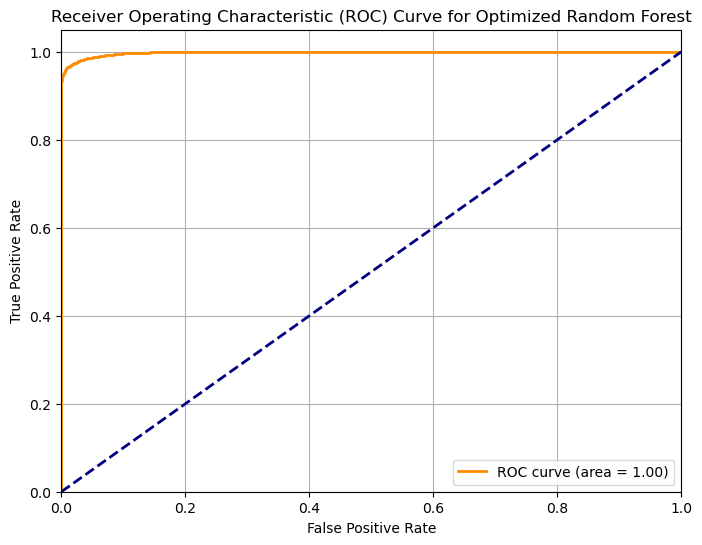


AUC for Optimized Random Forest: 0.9980


In [46]:
from sklearn.metrics import roc_curve, auc
#Curva ROC para o modelo final
fpr, tpr, thresholds = roc_curve(y_test, final_rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimized Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nAUC for Optimized Random Forest: {roc_auc:.4f}")

In [47]:
# --- Plotando Feature Importances ---

# importâncias das features
importances = final_rf_model.feature_importances_
feature_names = X_pca_df.columns # Ou X_train.columns se X_train também for um DataFrame com nomes

# 3. Criar um DataFrame para facilitar a ordenação e visualização
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [48]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances (Top 10):")
print(feature_importance_df.head(10))

Feature Importances (Top 10):
   Feature  Importance
0     PC_1    0.614529
10   PC_11    0.110845
11   PC_12    0.046325
3     PC_4    0.029919
9    PC_10    0.028773
5     PC_6    0.024571
7     PC_8    0.024385
8     PC_9    0.023735
6     PC_7    0.021549
2     PC_3    0.021014


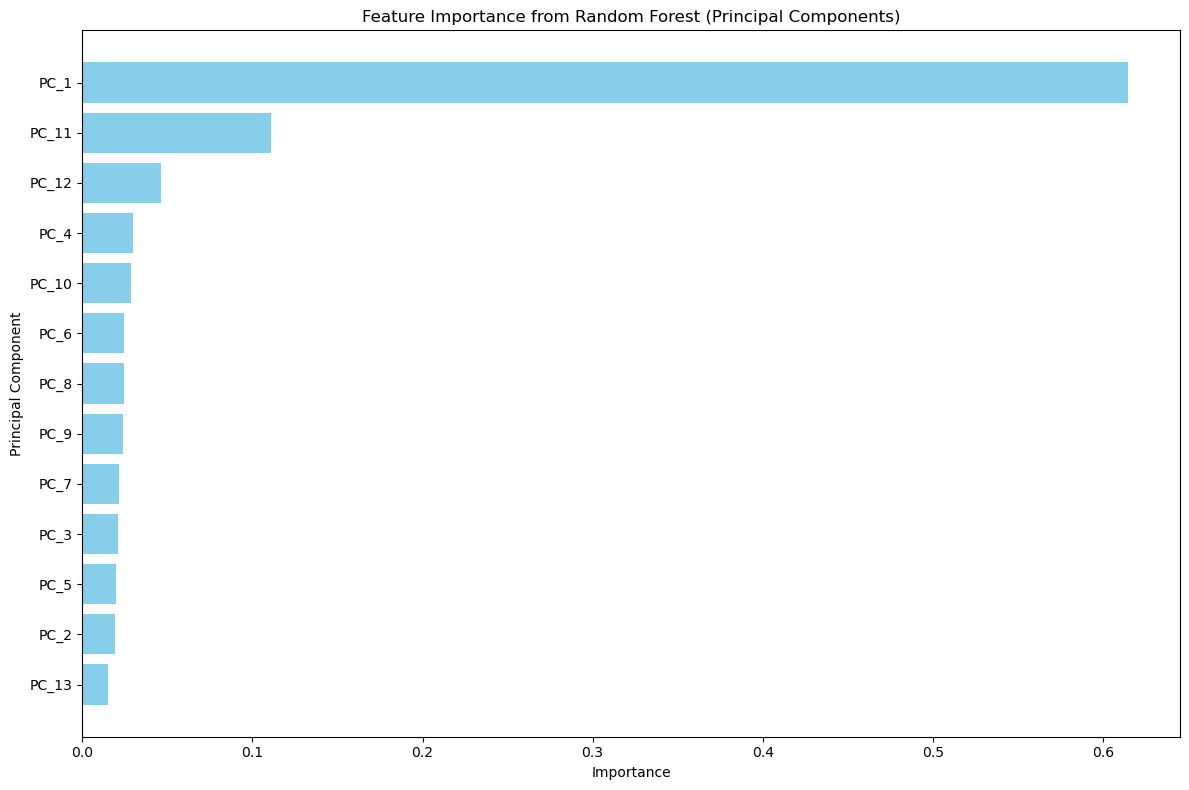

In [49]:
# grafico das feature impotances 

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Principal Component')
plt.title('Feature Importance from Random Forest (Principal Components)')
plt.gca().invert_yaxis() # Inverter o eixo y para que o mais importante fique no topo
plt.tight_layout()
plt.show()

## Modelo com Dataset Normal

In [50]:
Xn = df_zscore.drop(columns=['Target','nota_i1', 'nota_i2','nota_i3','nota_i4',
                          'nota_i5','nota_i6','nota_i7','nota_i8',
                            'nota_i9','nota_i10','nota_i11'])
yn = df_zscore['Target']

In [51]:
# Train-Test Split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

### Árvore de Decisão

In [52]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xn_train, yn_train)
dt_preds = dt.predict(Xn_test)
dt_probs = dt.predict_proba(Xn_test)[:, 1]

In [53]:
print("\n=== Decision Tree Evaluation ===")
print(confusion_matrix(yn_test, dt_preds))
print(classification_report(yn_test, dt_preds))

plt.show()


=== Decision Tree Evaluation ===
[[3024  175]
 [ 165 6381]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3199
           1       0.97      0.97      0.97      6546

    accuracy                           0.97      9745
   macro avg       0.96      0.96      0.96      9745
weighted avg       0.97      0.97      0.97      9745



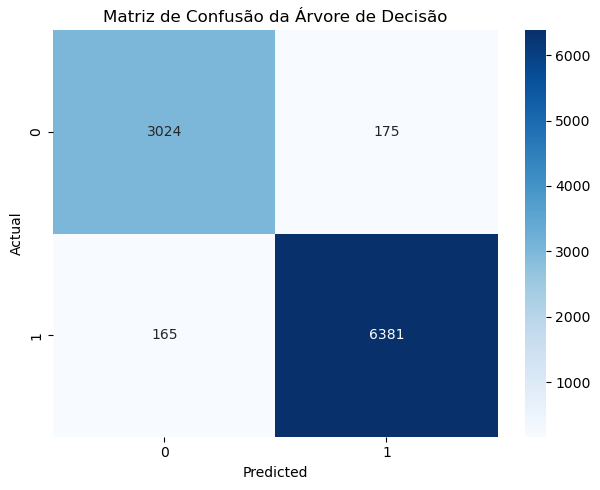

In [54]:
# --- Matriz de Confusão ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(yn_test, dt_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão da Árvore de Decisão')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### Random Forest

In [55]:
# Exemplo para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [56]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(Xn_train, yn_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [57]:
print(f"\nMelhores parâmetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Melhor acurácia com Random Forest: {grid_search_rf.best_score_:.4f}")


Melhores parâmetros para Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Melhor acurácia com Random Forest: 0.9764


In [58]:
# Você usaria grid_search_rf.best_estimator_ para fazer previsões agora
best_rf_preds = grid_search_rf.best_estimator_.predict(Xn_test)
print("\n=== Random Forest Otimizado Evaluation ===")
print(confusion_matrix(yn_test, best_rf_preds))
print(classification_report(yn_test, best_rf_preds))


=== Random Forest Otimizado Evaluation ===
[[3137   62]
 [ 156 6390]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3199
           1       0.99      0.98      0.98      6546

    accuracy                           0.98      9745
   macro avg       0.97      0.98      0.97      9745
weighted avg       0.98      0.98      0.98      9745



In [59]:
# Os melhores parametros
best_params_rf_commom = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}

In [60]:
final_rf_model_commom = RandomForestClassifier(random_state=42, **best_params_rf_commom)
final_rf_model_commom.fit(Xn_train, yn_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [61]:
print("\n--- Avaliando o Random Forest FINAL no conjunto de TESTE ---")
final_rf_preds_c = final_rf_model_commom.predict(Xn_test)
final_rf_probs_c = final_rf_model_commom.predict_proba(Xn_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(yn_test, final_rf_preds_c))

print("\nClassification Report:")
print(classification_report(yn_test, final_rf_preds_c))


--- Avaliando o Random Forest FINAL no conjunto de TESTE ---
Confusion Matrix:
[[3137   62]
 [ 156 6390]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3199
           1       0.99      0.98      0.98      6546

    accuracy                           0.98      9745
   macro avg       0.97      0.98      0.97      9745
weighted avg       0.98      0.98      0.98      9745



In [62]:
importances = final_rf_model_commom.feature_importances_

# 2. Obter os nomes das features
# Como não usamos PCA, os nomes são as colunas originais de X_common
feature_names = Xn.columns

# 3. Criar um DataFrame para facilitar a ordenação e visualização
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})



--- Feature Importances do Random Forest (Dataset Comum) ---
                     Feature  Importance
0              Margem EBITDA    0.229554
2         Indice de liquidez    0.195710
1      Divida liquida/EBTIDA    0.191804
6                 Auditorias    0.132768
4    Conversao Ebitda em FCO    0.079163
10              Serasa Score    0.071699
7                      PEFIN    0.024240
9                    Seguros    0.022699
8                   Garantia    0.020581
3           Ciclo Financeiro    0.018392
5   Tempo de atuação em anos    0.013390


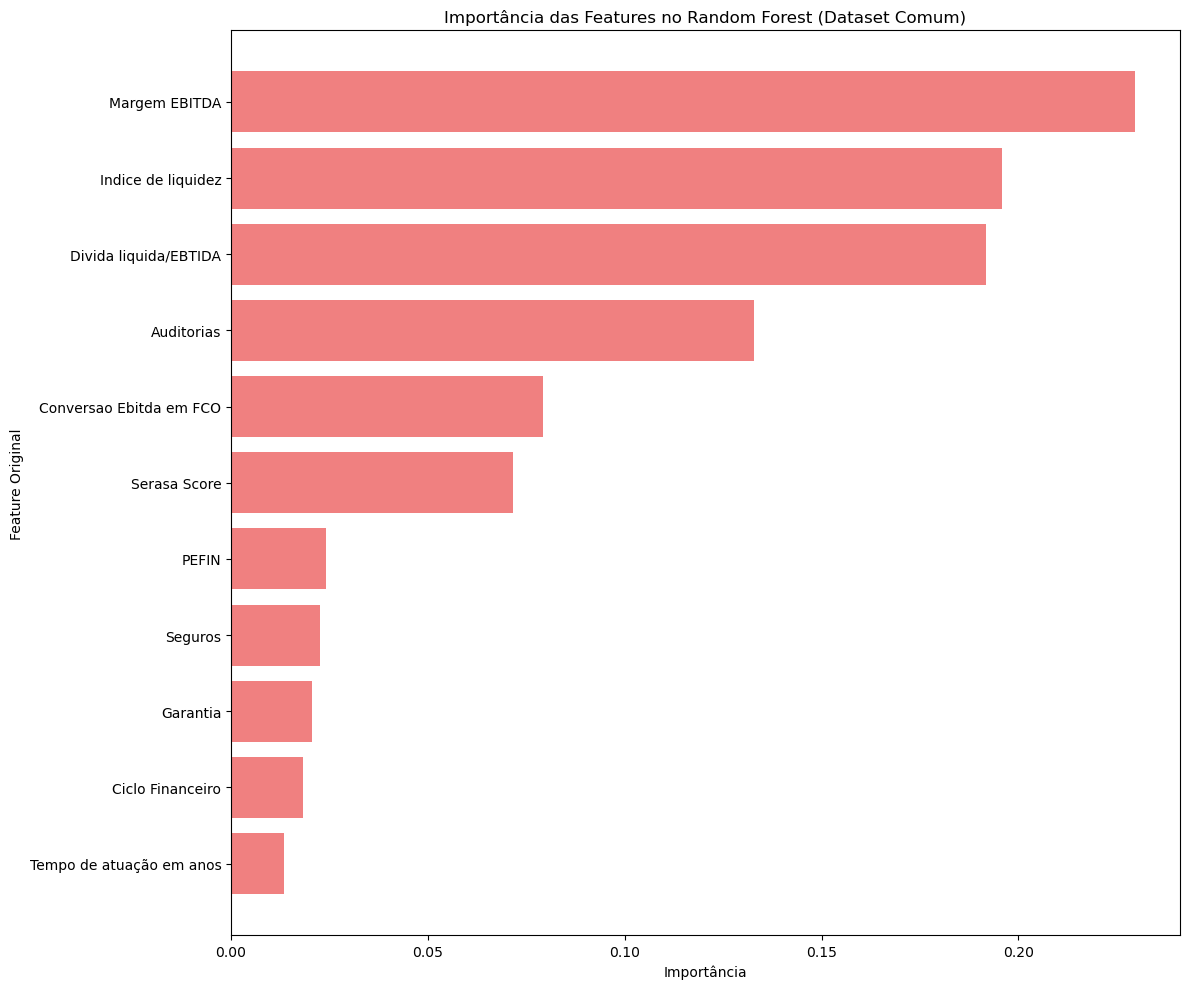

In [63]:
# 4. Ordenar as features por importância em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Feature Importances do Random Forest (Dataset Comum) ---")
print(feature_importance_df) # Imprime todas as importâncias para verificar

# 5. Plotar as importâncias
plt.figure(figsize=(12, 10)) # Ajuste o tamanho conforme necessário para todas as features
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightcoral')
plt.xlabel('Importância')
plt.ylabel('Feature Original')
plt.title('Importância das Features no Random Forest (Dataset Comum)')
plt.gca().invert_yaxis() # Inverter o eixo y para que o mais importante fique no topo
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig('feature_importances_random_forest_original_data.png', dpi=300, bbox_inches='tight') # Salva a imagem
plt.show()

* Interpretação de resultados:

    1. Prioridade de Métricas: Dependendo do problema de negócio (concessão de crédito), qual tipo de erro é mais custoso?
        - Falso Positivo (modelo prevê 1, mas é 0): Conceder crédito a quem não deveria. Relacionado à Precision da Classe 0 (ou Recall da Classe 1).
        - Falso Negativo (modelo prevê 0, mas é 1): Negar crédito a quem deveria receber. Relacionado à Recall da Classe 0 (ou Precision da Classe 1).
         Ambos os modelos têm excelente desempenho em ambas as classes!
    2. Interpretabilidade: O modelo sem PCA é mais fácil de interpretar diretamente, pois as importâncias das features se referem às colunas originais. O modelo com PCA depende da interpretação dos componentes principais, que exigiria analisar os pesos de cada feature original nos componentes.
  

### XGB

In [64]:
!pip install xgboost

In [65]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# --- Supondo que 'df' é o seu DataFrame completo, incluindo a coluna 'Target' ---
# df = pd.read_csv('seu_arquivo_de_dados.csv') # Exemplo de carregamento, se necessário

# 1. Separar features (X) e target (y)
X = df_zscore.drop(['Target','nota_i1', 'nota_i2','nota_i3','nota_i4',
                          'nota_i5','nota_i6','nota_i7','nota_i8',
                            'nota_i9','nota_i10','nota_i11'], axis=1) # Suas features originais
y = df_zscore['Target']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensões do X_train: {X_train.shape}")
print(f"Dimensões do X_test: {X_test.shape}")

Dimensões do X_train: (38976, 11)
Dimensões do X_test: (9745, 11)


In [66]:
print("\nIniciando treinamento do modelo XGBoost...")
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # Para classificação binária com probabilidades
    eval_metric='logloss',       # Métrica para monitorar o treinamento
    use_label_encoder=False,     # Para evitar um warning
    n_estimators=100,            # Número de árvores (ajuste via tuning)
    learning_rate=0.1,           # Taxa de aprendizado (ajuste via tuning)
    random_state=42,             # Para reprodutibilidade
    tree_method='hist'           # Geralmente mais rápido para datasets maiores
)


Iniciando treinamento do modelo XGBoost...


In [67]:
xgb_model.fit(X_train, y_train)

print("Treinamento do XGBoost concluído.")

C:\Users\Lucas Silva\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:36:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Treinamento do XGBoost concluído.


In [68]:
# Previsões de classe (0 ou 1)
y_pred_xgb = xgb_model.predict(X_test)

# Previsões de probabilidade para a classe positiva (classe 1)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [69]:

# Matriz de Confusão
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Confusion Matrix:
[[3172   23]
 [  98 6452]]


In [70]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3195
           1       1.00      0.99      0.99      6550

    accuracy                           0.99      9745
   macro avg       0.98      0.99      0.99      9745
weighted avg       0.99      0.99      0.99      9745



In [71]:
# ROC AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"\nROC AUC Score para XGBoost: {roc_auc_xgb:.4f}")


ROC AUC Score para XGBoost: 0.9993


In [72]:
importances_xgb = xgb_model.get_booster().get_score(importance_type='gain')

# Criar um DataFrame para facilitar a ordenação
feature_importance_df_xgb = pd.DataFrame({
    'Feature': list(importances_xgb.keys()),
    'Importance': list(importances_xgb.values())
})

In [73]:
# Ordenar as features por importância
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

print("\n--- Feature Importances do XGBoost (Top 10) ---")
print(feature_importance_df_xgb.head(10))


--- Feature Importances do XGBoost (Top 10) ---
                     Feature  Importance
1      Divida liquida/EBTIDA  503.123352
0              Margem EBITDA   59.308109
6                 Auditorias   25.120697
9                    Seguros   20.773487
8                   Garantia   19.722963
4    Conversao Ebitda em FCO   16.094662
10              Serasa Score   10.827003
2         Indice de liquidez    8.012329
7                      PEFIN    7.719912
5   Tempo de atuação em anos    7.237969


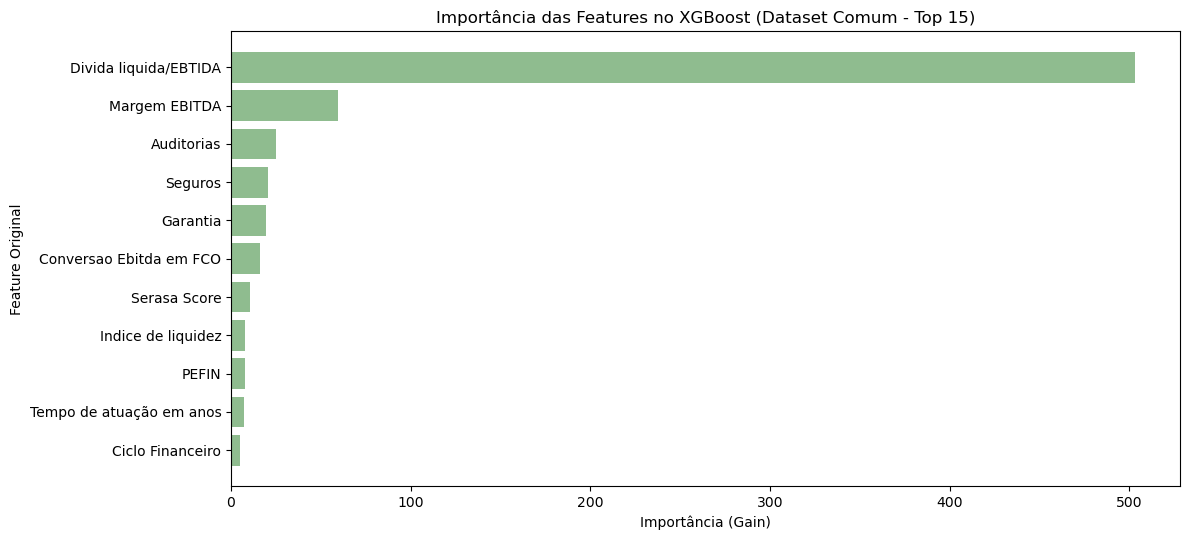

In [74]:
# Plotar as importâncias
plt.figure(figsize=(12, min(len(feature_importance_df_xgb), 15) * 0.5)) # Ajusta o tamanho dinamicamente
plt.barh(feature_importance_df_xgb['Feature'].head(15), feature_importance_df_xgb['Importance'].head(15), color='darkseagreen')
plt.xlabel('Importância (Gain)')
plt.ylabel('Feature Original')
plt.title('Importância das Features no XGBoost (Dataset Comum - Top 15)')
plt.gca().invert_yaxis() # Inverter o eixo y para que o mais importante fique no topo
plt.tight_layout()
plt.savefig('feature_importances_xgboost_original_data.png', dpi=300, bbox_inches='tight')
plt.show()

In [75]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de parâmetros
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Inicializar o modelo XGBoost com parâmetros fixos que não serão tunados
xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    tree_method='hist'
)

# Configurar o GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    scoring='roc_auc', # Ou 'accuracy', 'f1', o que for mais relevante
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # Usar todos os núcleos da CPU disponíveis
    verbose=1          # Para ver o progresso
)

print("\nIniciando GridSearchCV para XGBoost...")
grid_search_xgb.fit(X_train, y_train)

print(f"\nMelhores parâmetros para XGBoost: {grid_search_xgb.best_params_}")
print(f"Melhor ROC AUC com XGBoost (CV): {grid_search_xgb.best_score_:.4f}")

# Avaliar o melhor estimador no conjunto de teste
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_pred_proba_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

print("\n--- Avaliação do XGBoost Otimizado no Conjunto de Teste ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_xgb))
print(f"\nROC AUC Score para XGBoost Otimizado: {roc_auc_score(y_test, y_pred_proba_best_xgb):.4f}")


Iniciando GridSearchCV para XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Lucas Silva\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:40:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Melhores parâmetros para XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Melhor ROC AUC com XGBoost (CV): 0.9997

--- Avaliação do XGBoost Otimizado no Conjunto de Teste ---
Confusion Matrix:
[[3180   15]
 [  71 6479]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3195
           1       1.00      0.99      0.99      6550

    accuracy                           0.99      9745
   macro avg       0.99      0.99      0.99      9745
weighted avg       0.99      0.99      0.99      9745


ROC AUC Score para XGBoost Otimizado: 0.9997


### Gradient Boosting

In [77]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# --- Supondo que 'df' é o seu DataFrame completo, incluindo a coluna 'Target' ---
# df = pd.read_csv('seu_arquivo_de_dados.csv') # Exemplo de carregamento, se necessário

# 1. Separar features (X) e target (y)
X = df_zscore.drop(['Target','nota_i1', 'nota_i2','nota_i3','nota_i4',
                          'nota_i5','nota_i6','nota_i7','nota_i8',
                            'nota_i9','nota_i10','nota_i11'], axis=1) # Suas features originais
y = df_zscore['Target']             # Sua variável alvo

# 2. Dividir os dados em treino e teste
# Usamos 'stratify=y' para manter a proporção das classes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensões do X_train: {X_train.shape}")
print(f"Dimensões do X_test: {X_test.shape}")

Dimensões do X_train: (38976, 11)
Dimensões do X_test: (9745, 11)


In [78]:
X

,Margem EBITDA,Divida liquida/EBTIDA,Indice de liquidez,Ciclo Financeiro,Conversao Ebitda em FCO,Tempo de atuação em anos,Auditorias,PEFIN,Garantia,Seguros,Serasa Score
0,8.44,-0.94,1.94,101,31.81,4,6,0,1,2,900
1,3.70,2.23,0.62,99,-10.16,3,0,1,0,0,50
2,8.00,1.72,0.59,118,73.67,6,2,2,1,0,200
3,3.35,2.19,0.51,51,81.34,2,3,3,2,0,400
4,8.61,-0.17,2.40,21,69.11,4,2,0,2,3,550
...,...,...,...,...,...,...,...,...,...,...,...
49858,4.85,2.82,0.56,95,49.27,3,0,2,0,5,600
49859,11.85,0.02,1.31,-31,126.84,11,4,0,2,0,700
49860,13.15,0.34,1.20,-17,124.71,15,1,0,5,2,850
49861,5.77,2.72,0.87,148,-9.64,14,0,7,1,0,150


In [79]:
# --- 3. Criar e Treinar o Modelo Gradient Boosting ---

print("\nIniciando treinamento do modelo Gradient Boosting Classifier...")

# Inicializar o modelo GradientBoostingClassifier
# Alguns hiperparâmetros comuns para começar:
# n_estimators: Número de estágios de boosting (árvores) para realizar.
# learning_rate: Reduz a contribuição de cada árvore.
# max_depth: Profundidade máxima de cada estimador (árvore).
# subsample: Fração de amostras a serem usadas para ajustar as árvores individuais.
gb_model = GradientBoostingClassifier(
    n_estimators=100,      # Número de árvores
    learning_rate=0.1,     # Taxa de aprendizado
    max_depth=3,           # Profundidade máxima da árvore
    random_state=42        # Para reprodutibilidade
)

# Treinar o modelo
gb_model.fit(X_train, y_train)

print("Treinamento do Gradient Boosting concluído.")


Iniciando treinamento do modelo Gradient Boosting Classifier...
Treinamento do Gradient Boosting concluído.



--- Avaliando o Modelo Gradient Boosting Classifier no Conjunto de Teste ---
Confusion Matrix:
[[3168   27]
 [ 185 6365]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3195
           1       1.00      0.97      0.98      6550

    accuracy                           0.98      9745
   macro avg       0.97      0.98      0.98      9745
weighted avg       0.98      0.98      0.98      9745


ROC AUC Score para Gradient Boosting: 0.9988

--- Feature Importances do Gradient Boosting (Top 10) ---
                     Feature  Importance
1      Divida liquida/EBTIDA    0.664717
0              Margem EBITDA    0.171084
6                 Auditorias    0.078719
4    Conversao Ebitda em FCO    0.043944
8                   Garantia    0.014660
9                    Seguros    0.011702
10              Serasa Score    0.010883
5   Tempo de atuação em anos    0.002443
7                      PEFIN    0.000988
3          

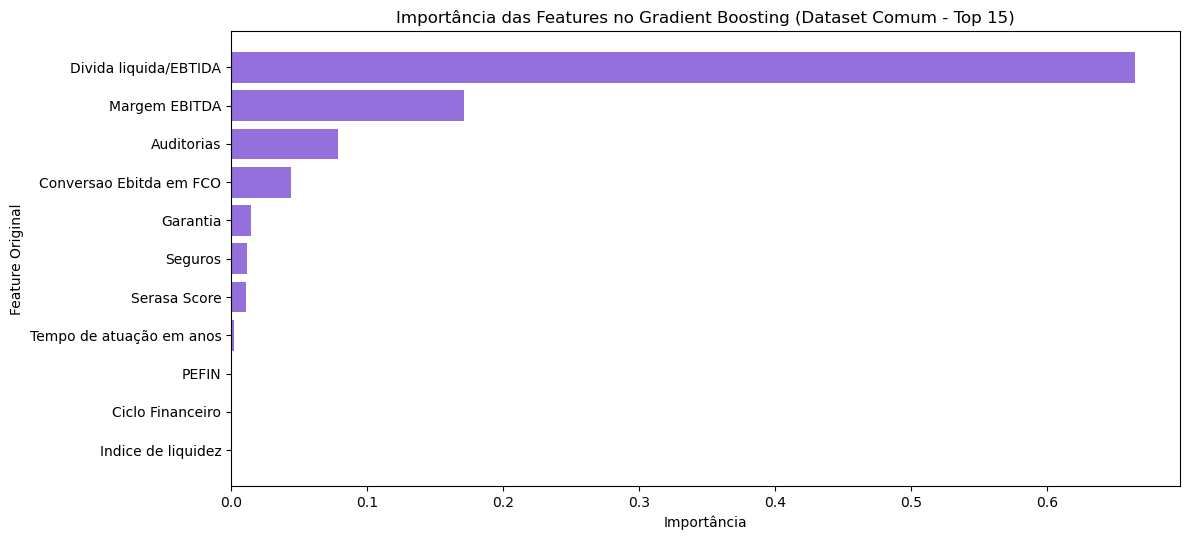

In [80]:
# --- 4. Fazer Previsões e Avaliar o Modelo ---

print("\n--- Avaliando o Modelo Gradient Boosting Classifier no Conjunto de Teste ---")

# Previsões de classe (0 ou 1)
y_pred_gb = gb_model.predict(X_test)

# Previsões de probabilidade para a classe positiva (classe 1)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Matriz de Confusão
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# ROC AUC Score
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f"\nROC AUC Score para Gradient Boosting: {roc_auc_gb:.4f}")

# --- 5. Plotar Feature Importances (opcional, mas recomendado) ---
# GradientBoostingClassifier também tem um atributo 'feature_importances_'

# Obter as importâncias das features
importances_gb = gb_model.feature_importances_

# Criar um DataFrame para facilitar a ordenação
feature_importance_df_gb = pd.DataFrame({
    'Feature': X.columns, # Usamos X.columns pois treinamos com as features originais
    'Importance': importances_gb
})

# Ordenar as features por importância
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

print("\n--- Feature Importances do Gradient Boosting (Top 10) ---")
print(feature_importance_df_gb.head(10))

# Plotar as importâncias
plt.figure(figsize=(12, min(len(feature_importance_df_gb), 15) * 0.5)) # Ajusta o tamanho dinamicamente
plt.barh(feature_importance_df_gb['Feature'].head(15), feature_importance_df_gb['Importance'].head(15), color='mediumpurple')
plt.xlabel('Importância')
plt.ylabel('Feature Original')
plt.title('Importância das Features no Gradient Boosting (Dataset Comum - Top 15)')
plt.gca().invert_yaxis() # Inverter o eixo y para que o mais importante fique no topo
plt.tight_layout()
plt.savefig('feature_importances_gradient_boosting_original_data.png', dpi=300, bbox_inches='tight')
plt.show()

In [81]:
# --- Exemplo de GridSearchCV para GradientBoostingClassifier ---

# Definir a grade de parâmetros
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Inicializar o modelo GradientBoostingClassifier com parâmetros fixos
gb_base = GradientBoostingClassifier(random_state=42)

# Configurar o GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_base,
    param_grid=param_grid_gb,
    scoring='roc_auc', # Ou 'accuracy', 'f1', o que for mais relevante para você
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # Usar todos os núcleos da CPU disponíveis
    verbose=1          # Para ver o progresso
)

print("\nIniciando GridSearchCV para Gradient Boosting Classifier...")
grid_search_gb.fit(X_train, y_train)

print(f"\nMelhores parâmetros para Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Melhor ROC AUC com Gradient Boosting (CV): {grid_search_gb.best_score_:.4f}")

# Avaliar o melhor estimador no conjunto de teste
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
y_pred_proba_best_gb = best_gb_model.predict_proba(X_test)[:, 1]

print("\n--- Avaliação do Gradient Boosting Otimizado no Conjunto de Teste ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_gb))
print(f"\nROC AUC Score para Gradient Boosting Otimizado: {roc_auc_score(y_test, y_pred_proba_best_gb):.4f}")


Iniciando GridSearchCV para Gradient Boosting Classifier...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Melhores parâmetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Melhor ROC AUC com Gradient Boosting (CV): 0.9996

--- Avaliação do Gradient Boosting Otimizado no Conjunto de Teste ---
Confusion Matrix:
[[3177   18]
 [  88 6462]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3195
           1       1.00      0.99      0.99      6550

    accuracy                           0.99      9745
   macro avg       0.99      0.99      0.99      9745
weighted avg       0.99      0.99      0.99      9745


ROC AUC Score para Gradient Boosting Otimizado: 0.9997
